### EfficientNetV2B0

### Name - Anirudh Tyagi
### School - School Of Computing and Data Science
### E-mail - anirudh.t-26@scds.saiuniversity.edu.in

- #### Total number of images: 959
- #### Number of images per class:
    - Damask Rose images: 200
    - Rain Lily images: 199
    - Echeveria Flower images: 200
    - Mirabilis Jalapa images: 200
    - Zinnia Elegans images: 160
- #### Total number of images used for training and testing:
    - Training : 719
    - Testing : 240

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import PIL
from PIL import Image

/Users/anirudhtyagi/Projects/DL_PROJECT/dl_project/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.16.2


In [2]:
from numpy import load
X_train_std = load('/Users/anirudhtyagi/Projects/DL_PROJECT/X_train_std.npy')
X_test_std = load('/Users/anirudhtyagi/Projects/DL_PROJECT/X_test_std.npy')
y_train = load('/Users/anirudhtyagi/Projects/DL_PROJECT/y_train.npy')
y_test = load('/Users/anirudhtyagi/Projects/DL_PROJECT/y_test.npy')

In [3]:
base_model = keras.applications.EfficientNetV2B0(
                include_top=False,
                weights="imagenet"
)

# Freeze the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainable = False

# Adding classifier
global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

x = keras.layers.BatchNormalization()(global_pool)
x = keras.layers.Dropout(0.35)(x)

output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

2025-01-09 02:35:49.526874: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-01-09 02:35:49.526931: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-09 02:35:49.526952: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-09 02:35:49.527259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-09 02:35:49.527286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
from sklearn.preprocessing import LabelEncoder
model_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks1_TL = [
             keras.callbacks.ModelCheckpoint("bestTL2.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
history1_TL = model_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks1_TL)

Epoch 1/10


/Users/anirudhtyagi/Projects/DL_PROJECT/dl_project/lib/python3.9/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)
2025-01-09 02:36:02.379903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


41/41 ━━━━━━━━━━━━━━━━━━━━ 31s 507ms/step - accuracy: 0.3550 - loss: 1.6709 - val_accuracy: 0.3889 - val_loss: 1.4317
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - accuracy: 0.5682 - loss: 1.1377 - val_accuracy: 0.3333 - val_loss: 1.3677
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 356ms/step - accuracy: 0.6294 - loss: 0.9470 - val_accuracy: 0.4028 - val_loss: 1.2837
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - accuracy: 0.6698 - loss: 0.9147 - val_accuracy: 0.4444 - val_loss: 1.1942
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.6754 - loss: 0.8592 - val_accuracy: 0.4861 - val_loss: 1.1205
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 318ms/step - accuracy: 0.6863 - loss: 0.7829 - val_accuracy: 0.6111 - val_loss: 1.0257
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - accuracy: 0.7003 - loss: 0.7653 - val_accuracy: 0.6806 - val_loss: 0.9451
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.7232 - loss: 0.7025 - val_accuracy: 0.694

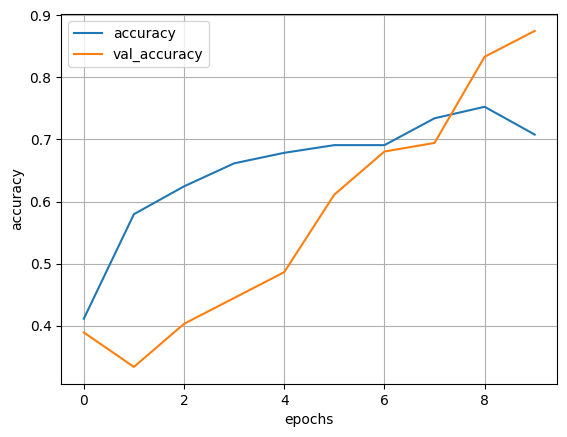

In [5]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history1_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [6]:
model_TL.load_weights("bestTL2.weights.h5")

In [7]:
model_TL.save("/Users/anirudhtyagi/Projects/DL_PROJECT/Model2_TL.keras")